# SUBJECT1

1. Import pandas and numpy libraries.
2. Read the Esense sensor readings csv file into a pandas Dataframe and converting UNIX time to Local TimeZone
3. Upsample Esense data to 100Hz to match with that of Bangle.js Data

In [1]:
import pandas as pd
import numpy as np
df_sub1_esense = pd.read_csv('..\sensor_data\eSense_sbj1.csv', names=['time','Device','E1','E2','E3','E4','E5','E6','Label'], index_col=0)
df_sub1_esense.index = pd.to_datetime(df_sub1_esense.index, unit='ms') + pd.Timedelta('02:00:00')
df_sub1_esense = df_sub1_esense.resample('10ms', origin='start').first().interpolate()
df_sub1_esense.sort_index()

,Device,E1,E2,E3,E4,E5,E6,Label
time,,,,,,,,
2021-04-14 18:11:47.373,eSense-0012,-0.461182,0.815430,-0.323242,-3.932927,1.737805,4.451220,layup
2021-04-14 18:11:47.383,None,-0.461792,0.816138,-0.322681,-3.798780,1.475610,4.210366,None
2021-04-14 18:11:47.393,None,-0.462402,0.816846,-0.322119,-3.664634,1.213415,3.969512,None
2021-04-14 18:11:47.403,None,-0.463013,0.817554,-0.321558,-3.530488,0.951220,3.728659,None
2021-04-14 18:11:47.413,None,-0.463623,0.818262,-0.320996,-3.396341,0.689024,3.487805,None
...,...,...,...,...,...,...,...,...
2021-04-14 18:49:10.753,None,-0.382965,-0.145905,0.936707,-1.379573,1.124238,0.038110,None
2021-04-14 18:49:10.763,eSense-0012,-0.383057,-0.145996,0.936279,-1.371951,1.067073,0.030488,running
2021-04-14 18:49:10.773,None,-0.383545,-0.145264,0.936157,-1.204268,1.128049,0.015244,None


1. Read Bangle.js ankle sensor readings csv file into pandas Dataframe for each individual activity (of Subject1)
2. Correcting timestamps by keeping the frequency at 92 Hz
3. Upsample Bangle.js data to 100Hz to match with that of Esense Data
4. Merge all activities dataframes into a single dataframe for Ankle sensor

In [2]:
df_sub1_ankle_dribbling = pd.read_csv('..\sensor_data\dribbling_sbj1_ankle.csv', index_col=0)
df_sub1_ankle_dribbling.index = pd.date_range(start='2021-04-14 18:22:13.553', periods = df_sub1_ankle_dribbling.shape[0], freq="10.869565ms")
df_sub1_ankle_dribbling = df_sub1_ankle_dribbling.resample('10ms', origin='start').first().interpolate()

df_sub1_ankle_layup = pd.read_csv('..\sensor_data\layup_sbj1_ankle.csv', index_col=0)
df_sub1_ankle_layup.index = pd.date_range(start='2021-04-14 18:22:13.553', periods = df_sub1_ankle_layup.shape[0], freq="10.869565ms")
df_sub1_ankle_layup = df_sub1_ankle_layup.resample('10ms', origin='start').first().interpolate()

df_sub1_ankle_shooting = pd.read_csv('..\sensor_data\shooting_sbj1_ankle.csv', index_col=0)
df_sub1_ankle_shooting.index = pd.date_range(start='2021-04-14 18:12:54.023', periods = df_sub1_ankle_shooting.shape[0], freq="10.869565ms")
df_sub1_ankle_shooting = df_sub1_ankle_shooting.resample('10ms', origin='start').first().interpolate()

df_sub1_ankle_movements = pd.read_csv('..\sensor_data\movements_sbj1_ankle_1.csv', index_col=0)
df_sub1_ankle_movements.index = pd.date_range(start='2021-04-14 18:42:32.023', periods = df_sub1_ankle_movements.shape[0], freq="10.869565ms")
df_sub1_ankle_movements = df_sub1_ankle_movements.resample('10ms', origin='start').first().interpolate()

df_sub1_ankle = pd.concat([df_sub1_ankle_layup, df_sub1_ankle_shooting, df_sub1_ankle_movements])
df_sub1_ankle['acc_z'] = df_sub1_ankle['acc_z'].replace({';':''}, regex=True)
df_sub1_ankle = df_sub1_ankle.set_axis(['A1', 'A2', 'A3'], axis=1)
df_sub1_ankle['A3'] = df_sub1_ankle['A3'].astype(np.float64)
#df_sub1_ankle.sort_index()

1. Read Bangle.js wrist sensor readings csv file into pandas Dataframe for each individual activity (of Subject1)
2. Correcting timestamps by keeping the frequency at 92 Hz
3. Upsample Bangle.js data to 100Hz to match with that of Esense Data
4. Merge all activities dataframes into a single dataframe for Wrist sensor

In [3]:
df_sub1_wrist_dribbling = pd.read_csv('..\sensor_data\dribbling_sbj1_wrist.csv', index_col=0)
df_sub1_wrist_dribbling.index = pd.date_range(start='2021-04-14 18:32:17.683', periods = df_sub1_wrist_dribbling.shape[0], freq="10.869565ms")
df_sub1_wrist_dribbling = df_sub1_wrist_dribbling.resample('10ms', origin='start').first().interpolate()

df_sub1_wrist_layup = pd.read_csv('..\sensor_data\layup_sbj1_wrist.csv', index_col=0)
df_sub1_wrist_layup.index = pd.date_range(start='2021-04-14 18:22:52.523', periods = df_sub1_wrist_layup.shape[0], freq="10.869565ms")
df_sub1_wrist_layup = df_sub1_wrist_layup.resample('10ms', origin='start').first().interpolate()

df_sub1_wrist_shooting = pd.read_csv('..\sensor_data\shooting_sbj1_wrist.csv', index_col=0)
df_sub1_wrist_shooting.index = pd.date_range(start='2021-04-14 18:13:12.833', periods = df_sub1_wrist_shooting.shape[0], freq="10.869565ms")
df_sub1_wrist_shooting = df_sub1_wrist_shooting.resample('10ms', origin='start').first().interpolate()

df_sub1_wrist_movements = pd.read_csv('..\sensor_data\movements_sbj1_wrist.csv', index_col=0)
df_sub1_wrist_movements.index = pd.date_range(start='2021-04-14 18:42:05.243', periods = df_sub1_wrist_movements.shape[0], freq="10.869565ms")
df_sub1_wrist_movements = df_sub1_wrist_movements.resample('10ms', origin='start').first().interpolate()

df_sub1_wrist = pd.concat([df_sub1_wrist_layup, df_sub1_wrist_shooting, df_sub1_wrist_movements])
df_sub1_wrist['acc_z'] = df_sub1_wrist['acc_z'].replace({';':''}, regex=True)
df_sub1_wrist = df_sub1_wrist.set_axis(['W1', 'W2', 'W3'], axis=1)
df_sub1_wrist['W3'] = df_sub1_wrist['W3'].astype(np.float64)
#df_sub1_wrist.sort_index()

1. Merge Esensor, Ankle, Wrist sensor dataframes into a single dataframe Subject1
2. Relabel all the records as null class
3. Relabel the records into 5 activites as per the Timestamps from the Videos

In [4]:
df_sub1 = pd.concat([df_sub1_esense, df_sub1_ankle, df_sub1_wrist], axis=1, join="inner")
df_sub1.Label = 'null'

#df_sub1.loc[pd.to_datetime('2021-04-14 19:27:01.000'):pd.to_datetime('2021-04-14 19:29:55.000'), 'Label'] = 'dribbling'
df_sub1.loc[pd.to_datetime('2021-04-14 18:23:20.000'):pd.to_datetime('2021-04-14 18:25:25.000'), 'Label'] = 'layup'
df_sub1.loc[pd.to_datetime('2021-04-14 18:45:18.000'):pd.to_datetime('2021-04-14 18:47:11.000'), 'Label'] = 'running'
df_sub1.loc[pd.to_datetime('2021-04-14 18:13:30.000'):pd.to_datetime('2021-04-14 18:15:40.000'), 'Label'] = 'shooting'
df_sub1.loc[pd.to_datetime('2021-04-14 18:42:48.000'):pd.to_datetime('2021-04-14 18:45:17.000'), 'Label'] = 'walking'
df_sub1

,Device,E1,E2,E3,E4,E5,E6,Label,A1,A2,A3,W1,W2,W3
2021-04-14 18:13:12.833,eSense-0012,-0.621582,0.654785,-0.159912,-54.420732,3.109756,15.853659,null,-0.98438,0.14380,0.13672,0.93042,0.47583,0.10889
2021-04-14 18:13:12.843,None,-0.621737,0.657693,-0.153609,-53.051552,2.973947,16.424612,null,-0.97852,0.13281,0.14478,0.94653,0.36230,0.05713
2021-04-14 18:13:12.853,None,-0.621893,0.660600,-0.147306,-51.682373,2.838137,16.995565,null,-0.99829,0.07910,0.17041,1.02271,0.16553,0.00415
2021-04-14 18:13:12.863,None,-0.622048,0.663508,-0.141002,-50.313193,2.702328,17.566519,null,-1.02441,0.03296,0.23364,1.01880,0.08423,-0.06494
2021-04-14 18:13:12.873,None,-0.622203,0.666415,-0.134699,-48.944013,2.566519,18.137472,null,-1.01465,0.05884,0.27393,0.97705,0.17603,-0.10010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-14 18:47:41.923,None,-0.551270,0.643555,-0.343384,7.637195,-4.062500,-22.500000,null,0.01123,-0.61719,-0.75732,0.32861,0.79370,-0.43042
2021-04-14 18:47:41.933,None,-0.554077,0.641235,-0.348083,6.775915,-3.387957,-23.003049,null,-0.00879,-0.61450,-0.79370,0.32983,0.77344,-0.41528
2021-04-14 18:47:41.943,eSense-0012,-0.556885,0.638916,-0.352783,5.914634,-2.713415,-23.506098,null,0.01440,-0.64624,-0.73730,0.33105,0.77051,-0.39087
2021-04-14 18:47:41.953,eSense-0012,-0.612793,0.617432,-0.362549,-1.219512,1.097561,-27.439024,null,0.01367,-0.61694,-0.75635,0.34131,0.78394,-0.37280


1. Drop unnecessary Columns
2. Drop all rows with any missing values

In [5]:
df_sub1 = df_sub1.drop(columns=['Device'])
df_sub1.dropna(inplace=True)
df_sub1.reset_index(drop=True, inplace=True)
df_sub1

,E1,E2,E3,E4,E5,E6,Label,A1,A2,A3,W1,W2,W3
0,-0.621582,0.654785,-0.159912,-54.420732,3.109756,15.853659,null,-0.98438,0.14380,0.13672,0.93042,0.47583,0.10889
1,-0.621737,0.657693,-0.153609,-53.051552,2.973947,16.424612,null,-0.97852,0.13281,0.14478,0.94653,0.36230,0.05713
2,-0.621893,0.660600,-0.147306,-51.682373,2.838137,16.995565,null,-0.99829,0.07910,0.17041,1.02271,0.16553,0.00415
3,-0.622048,0.663508,-0.141002,-50.313193,2.702328,17.566519,null,-1.02441,0.03296,0.23364,1.01880,0.08423,-0.06494
4,-0.622203,0.666415,-0.134699,-48.944013,2.566519,18.137472,null,-1.01465,0.05884,0.27393,0.97705,0.17603,-0.10010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61308,-0.551270,0.643555,-0.343384,7.637195,-4.062500,-22.500000,null,0.01123,-0.61719,-0.75732,0.32861,0.79370,-0.43042
61309,-0.554077,0.641235,-0.348083,6.775915,-3.387957,-23.003049,null,-0.00879,-0.61450,-0.79370,0.32983,0.77344,-0.41528
61310,-0.556885,0.638916,-0.352783,5.914634,-2.713415,-23.506098,null,0.01440,-0.64624,-0.73730,0.33105,0.77051,-0.39087
61311,-0.612793,0.617432,-0.362549,-1.219512,1.097561,-27.439024,null,0.01367,-0.61694,-0.75635,0.34131,0.78394,-0.37280


In [6]:
df_sub1['Label'].value_counts()

null        17885
walking     12516
shooting    10920
layup       10500
running      9492
Name: Label, dtype: int64

# Subject 2

In [7]:
df_sub2=pd.read_csv('df_sub2.csv')

In [8]:
df_sub2=pd.DataFrame(df_sub2)

In [9]:
df_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75890 entries, 0 to 75889
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      75890 non-null  float64
 1   E2      75890 non-null  float64
 2   E3      75890 non-null  float64
 3   E4      75890 non-null  float64
 4   E5      75890 non-null  float64
 5   E6      75890 non-null  float64
 6   Label   57036 non-null  object 
 7   A1      75890 non-null  float64
 8   A2      75890 non-null  float64
 9   A3      75890 non-null  float64
 10  W1      75890 non-null  float64
 11  W2      75890 non-null  float64
 12  W3      75890 non-null  float64
dtypes: float64(12), object(1)
memory usage: 7.5+ MB


## Concat the dataframes of 2 subjects

In [10]:
frames=[df_sub1,df_sub2]
combined_frame=pd.concat(frames)

In [11]:
combined_frame.loc[combined_frame['Label'] == 'dribbling']

,E1,E2,E3,E4,E5,E6,Label,A1,A2,A3,W1,W2,W3
32174,-0.616943,-0.362305,-0.178467,-163.353659,-113.414634,38.871951,dribbling,-0.86426,-0.49463,0.34448,0.50708,0.84814,0.93628
32175,-0.607544,-0.351288,-0.175659,-163.544207,-113.433689,39.249238,dribbling,-0.85718,-0.49585,0.30151,0.48926,0.81689,0.90112
32176,-0.598145,-0.340271,-0.172852,-163.734756,-113.452744,39.626524,dribbling,-0.93701,-0.39648,0.08472,0.48022,0.75684,0.85718
32177,-0.579346,-0.318237,-0.167236,-164.115854,-113.490854,40.381098,dribbling,-1.00317,-0.24487,-0.07593,0.43359,0.66968,0.84961
32178,-0.569946,-0.307220,-0.164429,-164.306402,-113.509909,40.758384,dribbling,-1.05054,-0.13062,-0.13770,0.42041,0.64136,0.77393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46785,-0.883362,-0.218109,-0.134979,-4.649390,5.114329,-9.607470,dribbling,-1.70679,-0.06372,1.43555,-0.03516,0.17358,1.29932
46786,-0.893066,-0.220947,-0.133545,-3.963415,5.121951,-8.932927,dribbling,-1.58447,-0.11304,1.28076,-0.02881,0.14282,1.31006
46787,-0.845459,-0.143799,-0.145996,9.695122,4.939024,1.890244,dribbling,-1.05371,-0.17627,0.80176,-0.02661,0.08984,1.31104
46788,-0.843533,-0.139838,-0.148139,9.684959,5.318428,2.063008,dribbling,-0.88794,-0.34277,0.70703,-0.02856,0.02100,1.29346


In [12]:
combined_frame['Label'].value_counts()

walking      24948
layup        23100
running      19824
shooting     17976
null         17885
dribbling    14616
Name: Label, dtype: int64

## Balancing the data for each class

In [13]:
walking= combined_frame[combined_frame['Label']=='walking'].head(14616).copy()
layup= combined_frame[combined_frame['Label']=='layup'].head(14616).copy()
running= combined_frame[combined_frame['Label']=='running'].head(14616).copy()
shooting= combined_frame[combined_frame['Label']=='shooting'].head(14616).copy()
dribbling= combined_frame[combined_frame['Label']=='dribbling'].copy()
null= combined_frame[combined_frame['Label']=='null'].head(14616).copy()

In [14]:
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([walking,layup,running,shooting,dribbling,null])

In [15]:
balanced_data['Label'].value_counts()

null         14616
layup        14616
dribbling    14616
running      14616
walking      14616
shooting     14616
Name: Label, dtype: int64

## Encoding the labels for training

In [16]:
from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()
balanced_data['label']=Label.fit_transform(balanced_data['Label'])
Label.classes_

array(['dribbling', 'layup', 'null', 'running', 'shooting', 'walking'],
      dtype=object)

## Standardize the data using Standart Scaler
### It normalizes each data value x by (x-mean/std_dev(data[column]))


In [17]:
column = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'A1', 'A2', 'A3', 'W1', 'W2', 'W3']
X=balanced_data[column]
Y=balanced_data['label']


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)

scaledx=pd.DataFrame(data=x, columns=column)
scaledx['label']=Y.values


In [19]:
scaledx

,E1,E2,E3,E4,E5,E6,A1,A2,A3,W1,W2,W3,label
0,-0.432802,-0.285557,0.044585,-0.034835,-0.312419,0.476065,0.132762,0.170295,-0.067685,-0.004028,-0.096691,1.036922,5
1,-0.390921,-0.285012,0.135537,-0.013069,-0.365905,0.465650,0.134119,0.159042,-0.066083,0.057875,-0.144406,1.086520,5
2,-0.307157,-0.283921,0.317442,0.030464,-0.472876,0.444820,0.139924,0.160349,-0.079831,0.288928,-0.018251,0.568301,5
3,-0.265276,-0.283376,0.408394,0.052230,-0.526362,0.434405,0.143001,0.160617,-0.084594,0.464769,-0.018251,0.469791,5
4,-0.223394,-0.282830,0.499347,0.073996,-0.579848,0.423991,0.150178,0.158528,-0.092518,0.671990,-0.073865,0.393853,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87691,-0.157522,-0.054054,0.914476,0.003989,0.666641,-0.407184,-1.461804,0.138637,-0.074007,-0.367912,0.024476,-0.264965,2
87692,-0.164376,-0.053236,0.913563,0.027530,0.670721,-0.429246,-1.643139,-0.436709,0.459317,-0.364424,0.019501,-0.260860,2
87693,-0.178085,-0.051600,0.911737,0.074610,0.678880,-0.473369,-0.799931,-0.164340,1.550842,-0.379245,0.028576,-0.213657,2
87694,-0.217979,-0.056835,0.899409,0.085800,0.695197,-0.469673,0.195599,0.516707,0.879018,-0.364710,0.080966,-0.175688,2


## Constructing the Frames

In [20]:
import scipy.stats as stats

frequency=100
frame_size = frequency*5
hopsize = frequency*2




#### The function frames(dataFrame,frameSize,hopsize) takes the parameters and returns the lists(ie . frames and labels) which are collection of frames and labels differing by the hopsize to get data for the duration of activity
#### Here the duration is taken to be 5 seconds . This implies that each frame(list) has the sensor data for a duration of 5 seconds. Also each frame in frames differs by 2 seconds as calculated in the previous cell 
     

In [21]:
def frames(dataFrame,frameSize,hopsize):
    featureCount=12
    frames=[]
    labels=[]
    for i in range(0,len(dataFrame)-frameSize,hopsize):
        E1=dataFrame['E1'].values[i : i+frameSize]
        E2=dataFrame['E2'].values[i : i+frameSize]
        E3=dataFrame['E3'].values[i : i+frameSize]
        E4=dataFrame['E4'].values[i : i+frameSize]
        E5=dataFrame['E5'].values[i : i+frameSize]
        E6=dataFrame['E6'].values[i : i+frameSize]
        A1=dataFrame['A1'].values[i : i+frameSize]
        A2=dataFrame['A2'].values[i : i+frameSize]
        A3=dataFrame['A3'].values[i : i+frameSize]
        W1=dataFrame['W1'].values[i : i+frameSize]
        W2=dataFrame['W2'].values[i : i+frameSize]
        W3=dataFrame['W3'].values[i : i+frameSize]


        label= stats.mode(dataFrame['label'][i : i+frameSize])[0][0]
        frames.append([E1, E2, E3, E4, E5, E6, A1, A2, A3, W1, W2, W3])
        labels.append(label)
    
    frames=np.asarray(frames).reshape(-1,frameSize,featureCount)
    labels=np.asarray(labels)
    return frames,labels



In [22]:
X,y = frames(scaledx,frame_size,hopsize)

#### Here we are getting 436 frames with each frame of size (500,12) i.e 500 entries with 12 features(classes) and the corresponding labels. That is each frame has a distinct label which is calculated with the help of taking mode of labels for the activity as in previous cell

In [23]:
X.shape , y.shape

((436, 500, 12), (436,))

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.3,random_state=0, stratify= y)

In [25]:
X_train.shape,X_test.shape

((305, 500, 12), (131, 500, 12))

In [26]:
X_train[0].shape

(500, 12)

In [27]:
#### The model is implementing Conv2D layer and hence it requires data of 3 dimensions at least. The train and testing data is reshaped below

In [28]:
X_train=X_train.reshape(305, 500, 12, 1)
X_test=X_test.reshape(131, 500, 12,1)


In [29]:
X_train[0].shape

(500, 12, 1)

# Building the model

In [30]:
from keras import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,ReLU,BatchNormalization,MaxPool2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=X_train[0].shape))

model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2),activation='relu'))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(6,activation='softmax'))


In [31]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
10/10 [==============================] - 4s 422ms/step - loss: 8.8157 - accuracy: 0.3738 - val_loss: 1.5642 - val_accuracy: 0.7023
Epoch 2/10
10/10 [==============================] - 4s 406ms/step - loss: 1.2487 - accuracy: 0.7869 - val_loss: 0.5259 - val_accuracy: 0.8550
Epoch 3/10
10/10 [==============================] - 4s 396ms/step - loss: 0.3538 - accuracy: 0.9213 - val_loss: 0.2499 - val_accuracy: 0.9389
Epoch 4/10
10/10 [==============================] - 4s 386ms/step - loss: 0.0373 - accuracy: 0.9836 - val_loss: 0.2096 - val_accuracy: 0.9466
Epoch 5/10
10/10 [==============================] - 4s 396ms/step - loss: 0.0166 - accuracy: 0.9967 - val_loss: 0.1970 - val_accuracy: 0.9542
Epoch 6/10
10/10 [==============================] - 4s 395ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.1720 - val_accuracy: 0.9542
Epoch 7/10
10/10 [==============================] - 4s 395ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9695
Epoch 

### Plotting the learning curve

In [33]:
import matplotlib.pyplot as plt
def plotCurve(history,epochs):
    epoc_range=range(1,epochs+1)
    plt.plot(epoc_range,history.history['accuracy'])
    plt.plot(epoc_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()


    plt.plot(epoc_range,history.history['loss'])
    plt.plot(epoc_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()




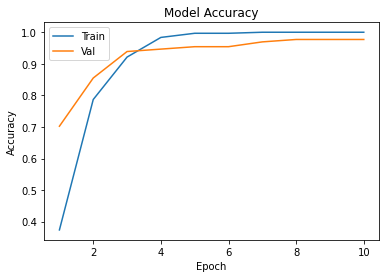

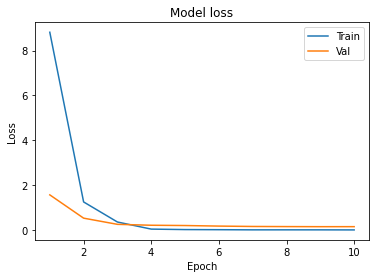

In [34]:
plotCurve(history,10)

In [35]:
from keras.models import save_model
model.save('Model1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Model1\assets
